Julia has a built-in profiler, but I propose using the ProfileView package. The good thing about this package is that we get a nice visual representation of the time spent in each function. 

In [1]:
using Laplacians

INFO: Recompiling stale cache file /Users/rjkyng/.julia/lib/v0.4/Laplacians.ji for module Laplacians.
INFO: Recompiling stale cache file /Users/rjkyng/.julia/lib/v0.4/DataStructures.ji for module DataStructures.
INFO: Recompiling stale cache file /Users/rjkyng/.julia/lib/v0.4/PyPlot.ji for module PyPlot.
INFO: Recompiling stale cache file /Users/rjkyng/.julia/lib/v0.4/PyCall.ji for module PyCall.
INFO: Recompiling stale cache file /Users/rjkyng/.julia/lib/v0.4/Conda.ji for module Conda.
INFO: Recompiling stale cache file /Users/rjkyng/.julia/lib/v0.4/FixedPointNumbers.ji for module FixedPointNumbers.
INFO: Recompiling stale cache file /Users/rjkyng/.julia/lib/v0.4/ColorTypes.ji for module ColorTypes.
INFO: Recompiling stale cache file /Users/rjkyng/.julia/lib/v0.4/Colors.ji for module Colors.
INFO: Recompiling stale cache file /Users/rjkyng/.julia/lib/v0.4/LaTeXStrings.ji for module LaTeXStrings.


In [2]:
include("../src/samplingSolver.jl")

purge (generic function with 1 method)

In [3]:
using ProfileView

INFO: Precompiling module ProfileView...
INFO: Precompiling module ProfileViewSVG...


Now, let's run the buildSolver function and see what the profiling looks like. To add function to profiling, we need to add the '@profile' tag before the run. 

In [4]:
a = chimera(100, 1);

In [7]:
@profile buildSolver(a);

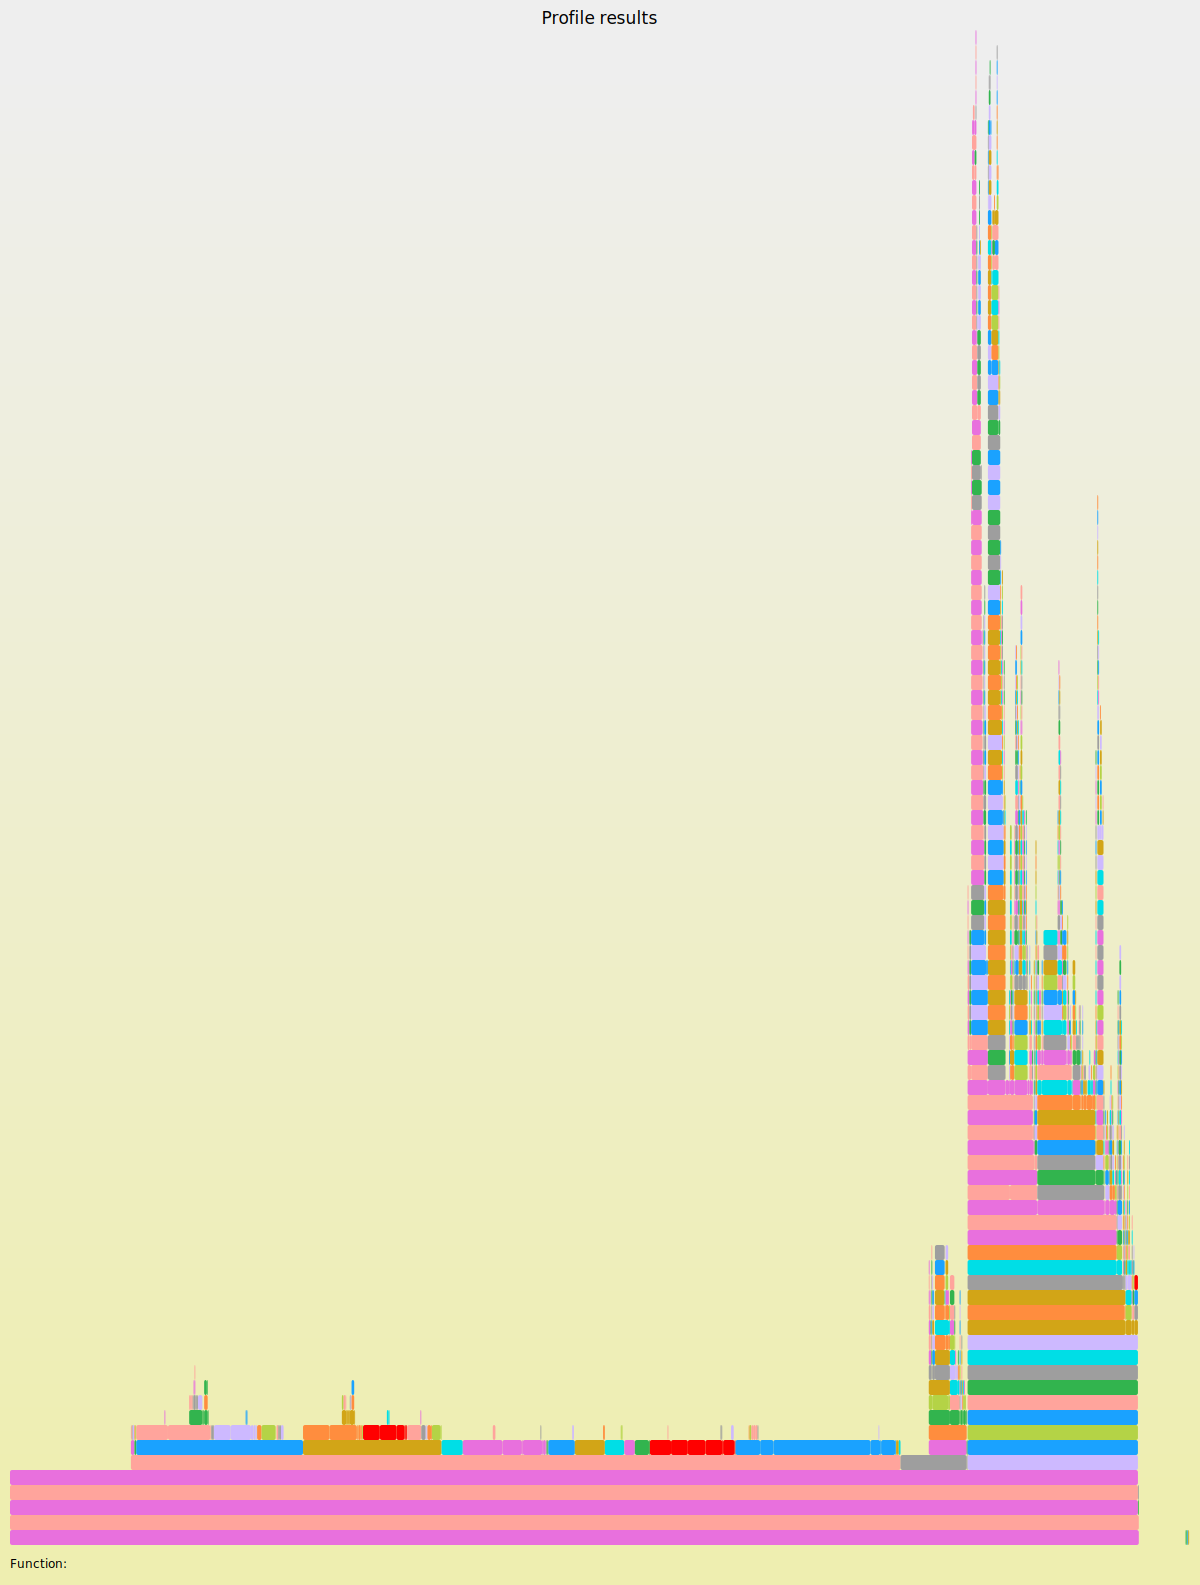

In [6]:
ProfileView.view()

As we can see, right now most of the time is taken by the srand calls in samplingLDL

Some useful things to know when running the profiler:
- In general, it is good to have several runs of the code, just to get the expected running time vs running time for a single execution
- ProfileView might lag out a bit if there are a lot of results. Be patient, and do not scroll up/down. You can zoom in the results by scrolling, and if you do that while the notebook is freezed you will just mess up the proportions of the profiling
- Dragging the Profile results around also works

Let's do a different example. We should run Profile.clear() before proceeding. Profile.clear() refreshes the profiler.

In [8]:
Profile.clear()

In [9]:
for i in 1:10
    a = chimera(500, 1);
    @profile buildSolver(a, eps = 0.4, sampConst = 11)
end

LoadError: LoadError: InterruptException:
while loading In[9], in expression starting on line 1

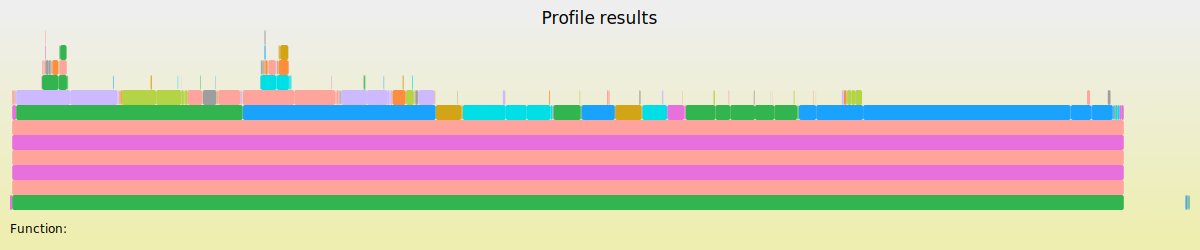

In [15]:
pygui(true)
ProfileView.view()

In [14]:
using PyPlot
using PyCall